# Technical Report by Nathan Bashant and Reid Plowman


## Introduction
The dataset we used was a complete csv file containing college students exam scores and information regarding them. The subjects with scores recorded are: reading, writing, and math. The data additionally contains the students gender, parental level of education, lunch mode, and if they had taken a test preparation course. 

Our classification goal was to see if the other attributes regarding the student actually affected their exam scores. Additionally, we discretized the exam scores for each subject into 3 categories: low, fair, and excellent. 

Another classification task was to see which subject had the highest average score, and which subjects had the most scores in any given discretized category. Our random forest classifier had the highest accurancy and most success when classifying our data.

## Data Analysis
### Student Exam Scores
Our dataset consisted of 8 attributes, 3 of which being the exam subject scores. The exam scores were all integers, and the other 5 attributes were all strings. There were exactly 1000 instances in our dataset, and the 3 exam subjects were used as our labels. We additonally discretized the int exam scores into string categories: low, fair, and excellent.

## Load the Data
Load the data from `exams.csv` and store it in a MyPyTable object named exams_table.

In [63]:
import os
import importlib

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

exams_fname = os.path.join("input_data", "exams.csv")
exams_table = MyPyTable()
exams_table.load_from_file(exams_fname)

## Visualize Test Score Distributions
Displaying the distributions of the scores for each exam will help with the discretization process.

1. Figure 1 below represents a frequency diagram of the math score distribution
2. Figure 2 below represents a frequency diagram of the reading score distribution
3. Figure 3 below represents a frequency diagram of the writing score distribution

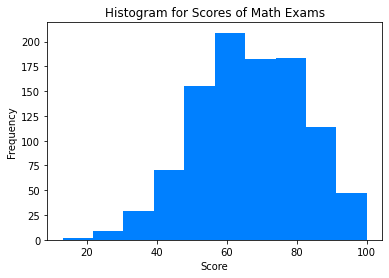

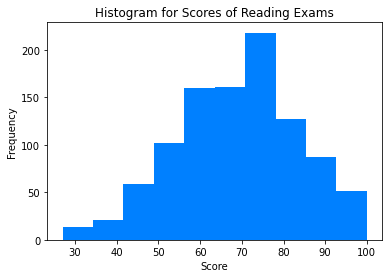

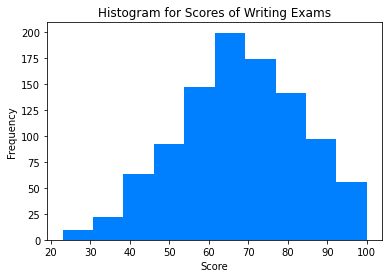

In [64]:
import plot_utils
importlib.reload(plot_utils)

math_data = exams_table.get_column("math score")
title = "Histogram for Scores of Math Exams"
plot_utils.plot_histogram(math_data, "Score", "Frequency", title)

reading_data = exams_table.get_column("reading score")
title = "Histogram for Scores of Reading Exams"
plot_utils.plot_histogram(reading_data, "Score", "Frequency", title)

writing_data = exams_table.get_column("writing score")
title = "Histogram for Scores of Writing Exams"
plot_utils.plot_histogram(writing_data, "Score", "Frequency", title)


#### Figure 4 below (box and whisker plot) shows the score distribution for each exam subject, as well as the average score for each subject.

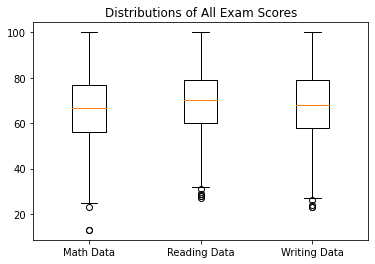

Math Average: 66.396
Reading Average: 69.002
Writing Average: 67.738


In [65]:
all_exam_scores = [math_data, reading_data, writing_data]
chart_title = "Distributions of All Exam Scores"
plot_utils.box_plot(all_exam_scores, ["Math Data", "Reading Data", "Writing Data"], chart_title)

print("Math Average:", sum(math_data) / len(math_data))
print("Reading Average:", sum(reading_data) / len(reading_data))
print("Writing Average:", sum(writing_data) / len(writing_data))

## Relevant Summary Statistics and Visualizations
It is clearly shown that the reading score had the highest average, with a score of 69.002. The second highest average was writing with an average score of 67.738, and the lowest average was math with an average score of 66.396


1. Figure 4 shows the discretized math score distribution
1. Figure 5 shows the discretized reading score distribution
1. Figure 6 shows the discretized writing score distribution

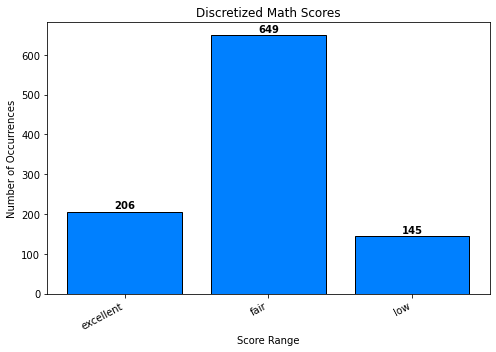

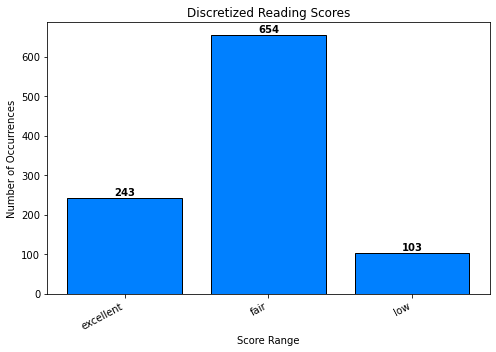

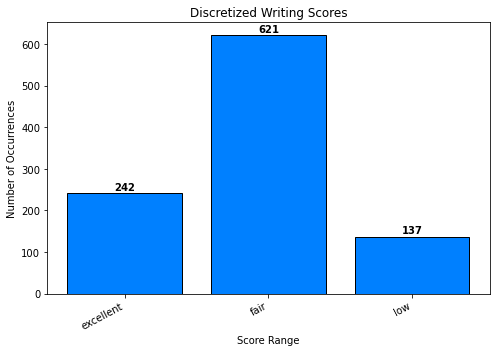

In [66]:
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

importlib.reload(plot_utils)


discretized_table = myutils.discretize_columns(exams_table, ["math score", "reading score", "writing score"], \
    myutils.exam_score_discretizer)

math_scores = discretized_table.get_column("math score")
reading_scores = discretized_table.get_column("reading score")
writing_scores = discretized_table.get_column("writing score")

#call get frequencies, show/visualize percentage of low medium and high 
ma_values, ma_counts = discretized_table.get_column_frequencies("math score")
plot_utils.plot_bar_chart(ma_values, ma_counts, "Score Range", "Number of Occurrences", \
    "Discretized Math Scores", True, (7, 5))

re_values, re_counts = discretized_table.get_column_frequencies("reading score")
plot_utils.plot_bar_chart(re_values, re_counts, "Score Range", "Number of Occurrences", \
    "Discretized Reading Scores", True, (7, 5))

wr_values, wr_counts = discretized_table.get_column_frequencies("writing score")
plot_utils.plot_bar_chart(wr_values, wr_counts, "Score Range", "Number of Occurrences", \
    "Discretized Writing Scores", True, (7, 5))

## Classification Results

In [67]:
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyDecisionTreeClassifier, \
    MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation


# Predict math score
# X_col_names = ["test preparation course", "reading score", "writing score"]
# X_values = myutils.get_columns_of_table(discretized_table, ["reading score", "writing score"])
# y_values = math_scores.copy()


# Predict reading score
X_col_names = ["test preparation course", "math score", "writing score"]
X_values = myutils.get_columns_of_table(discretized_table, ["test preparation course", "math score", "writing score"])
y_values = reading_scores.copy()

# Predict writing score
# X_col_names = ["test preparation course", "math score", "reading score"]
# X_values = myutils.get_columns_of_table(discretized_table, ["math score", "reading score"])
# y_values = writing_scores.copy()


folds = myevaluation.stratified_kfold_split(X_values, y_values, 10, 0, True)

dummy_clf = MyDummyClassifier()
myutils.calc_classifier_performance(X_values, y_values, dummy_clf, "Dummy", folds, "excellent", "score")

Dummy Classifier Performance Metrics:
Accuracy: 0.6541
Error rate: 0.3459
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent            0     243      0      243                  0
fair                 0     654      0      654                100
low                  0     103      0      103                  0


In [68]:
knn_clf = MyKNeighborsClassifier()
myutils.calc_classifier_performance(X_values, y_values, knn_clf, "kNN", folds, "excellent", "score")

kNN Classifier Performance Metrics:
Accuracy: 0.763
Error rate: 0.237
Precision: 0.7462
Recall: 0.8312
F1 Score: 0.7687
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent          202      41      0      243              83.13
fair               100     550      4      654              84.1
low                  1      92     10      103               9.71


In [69]:
tree_clf = MyDecisionTreeClassifier()
myutils.calc_classifier_performance(X_values, y_values, tree_clf, "Decision Tree", folds, "excellent", "score")

Decision Tree Classifier Performance Metrics:
Accuracy: 0.8591
Error rate: 0.1409
Precision: 0.8258
Recall: 0.8228
F1 Score: 0.8227
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent          200      43      0      243              82.3
fair                42     567     45      654              86.7
low                  0      11     92      103              89.32


In [70]:
forest_clf = MyRandomForestClassifier(20, 7, 2)
myutils.calc_classifier_performance(X_values, y_values, forest_clf, "Random Forest", \
    folds, "excellent", "score")

Random Forest Classifier Performance Metrics:
Accuracy: 0.8591
Error rate: 0.1409
Precision: 0.8258
Recall: 0.8228
F1 Score: 0.8227
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent          200      43      0      243              82.3
fair                42     567     45      654              86.7
low                  0      11     92      103              89.32


In [71]:
X_vals = discretized_table.get_other_columns(["math score", "reading score", "writing score"]).data
forest_clf = MyRandomForestClassifier(30, 10, 4)

myutils.calc_classifier_performance(X_vals, y_values, forest_clf, "Random Forest", \
    folds, "excellent", "score")

Random Forest Classifier Performance Metrics:
Accuracy: 0.6519
Error rate: 0.3481
Precision: 0.4923
Recall: 0.1893
F1 Score: 0.2694
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent           46     197      0      243              18.93
fair                46     606      2      654              92.66
low                  2     101      0      103               0


### Classification Results Cont.
describe here

## Conclusion
The dataset we chose came with the inherent challenge of discretization, and the challenge of how to use non-integer attributes. The classification approach we developed for this dataset was to discretize the exam scores into three categories, and then try to predict exam scores based off of non-exam score attributes. However, exam scores were not predicted very accurately when trained on only non-exam score attributes.

There was something interesting that we noticed. When the random forest and decision tree classifiers were given all attributes including other exam scores to try and predict another subjects exam score, the best performing trees would always have decision rules that centered around the other exam score attributes. This gave us the impression that the non-score attributes did not have a high correlation with the exam scores.

Most of our classifiers performed well when trained on just the exam score attributes. The accuracy when given exam scores was around 80% average for all classifiers, and the accuracy when given only non-exam score attributes was around 60% average. If we fine-tuned the attribute selection some more, and possibly condensed some attribute values, those accuracies could improve.